In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen = ImageDataGenerator(rescale=1/255)

In [4]:
train_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab material/DL Dataset/Practical 5/Chest X-Rays/train",
    target_size=(416,416),
    batch_size=64,
    class_mode="categorical"
)

Found 12229 images belonging to 2 classes.


In [5]:
test_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab material/DL Dataset/Practical 5/Chest X-Rays/test",
    target_size=(416,416),
    batch_size=64,
    class_mode="categorical"
)

Found 582 images belonging to 2 classes.


In [6]:
validation_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab material/DL Dataset/Practical 5/Chest X-Rays/valid",
    target_size=(416,416),
    batch_size=64,
    class_mode="categorical"
)

Found 1165 images belonging to 2 classes.


In [7]:
from tensorflow import keras

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(416,416,3)),
    keras.layers.MaxPooling2D((2,2)), # 52

    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)), # 13

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)), # 13

    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)), # 13

    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)), # 13

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)), # 13

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(2, activation="softmax"),
])

In [13]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 414, 414, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 207, 207, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 205, 205, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 102, 102, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 100, 100, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 9, 9, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 724,058 (2.76 MB)

 Trainable params: 724,058 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
report = model.fit(train_data,epochs=10)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 123s 622ms/step - accuracy: 0.7285 - loss: 0.5852
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 122s 612ms/step - accuracy: 0.7599 - loss: 0.4886
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 122s 619ms/step - accuracy: 0.8384 - loss: 0.3565
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 143s 622ms/step - accuracy: 0.8727 - loss: 0.3008
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 143s 627ms/step - accuracy: 0.9070 - loss: 0.2514
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 122s 615ms/step - accuracy: 0.9183 - loss: 0.2195
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 122s 616ms/step - accuracy: 0.9203 - loss: 0.2149
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 124s 629ms/step - accuracy: 0.9269 - loss: 0.2044
Epoch 9/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 123s 623ms/step - accuracy: 0.9246 - loss: 0.2020
Epoch 10/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 142s 623ms/step - accuracy: 0.9319 - loss: 0.1785


In [17]:
model.evaluate(test_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 199s 22s/step - accuracy: 0.9452 - loss: 0.1856


[0.1780606210231781, 0.9398625493049622]

In [23]:
train_data[0][1]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

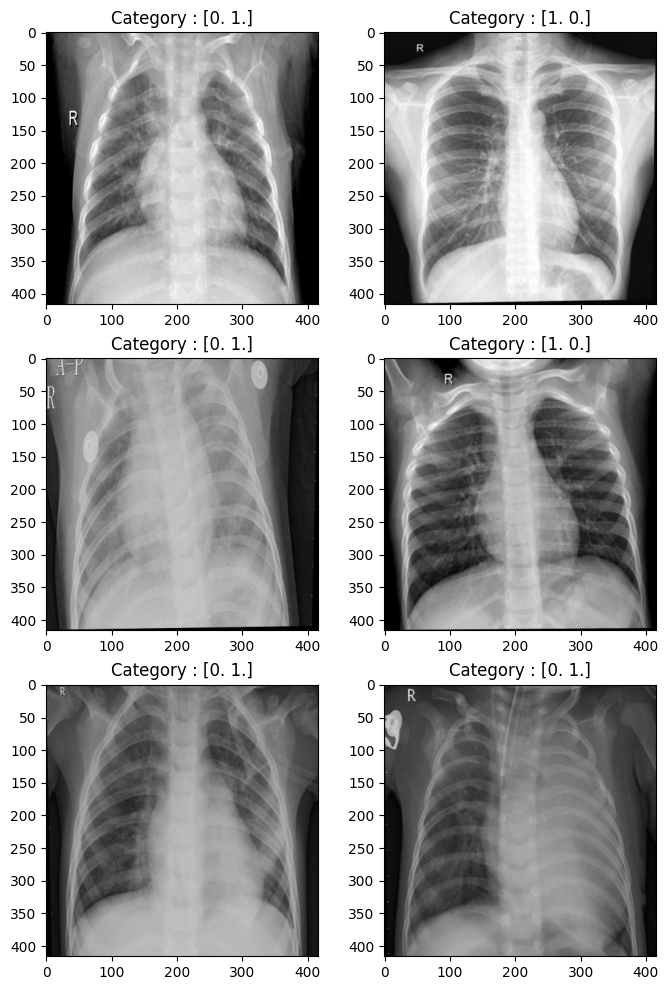

In [24]:
plt.figure(figsize=(8,12))

for x in range(0, 6):
  plt.subplot(3,2,x+1)
  plt.title(f"Category : {train_data[0][1][x]}")
  plt.imshow(train_data[0][0][x])

In [25]:
def softmax_to_category(x):
  return np.argmax(x)

<ipython-input-27-54ae57a8893f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


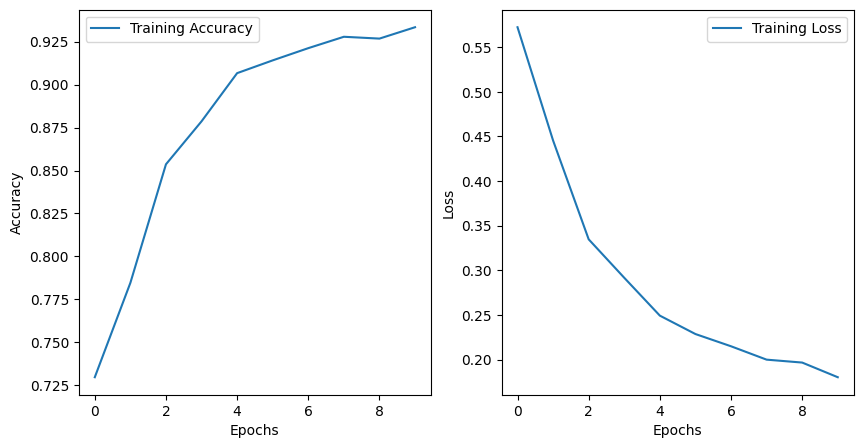

In [27]:
plt.figure(figsize=(10,5))
plt.title("Model Performance")
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(report.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.plot(report.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
test_data[0][0].shape

(64, 416, 416, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


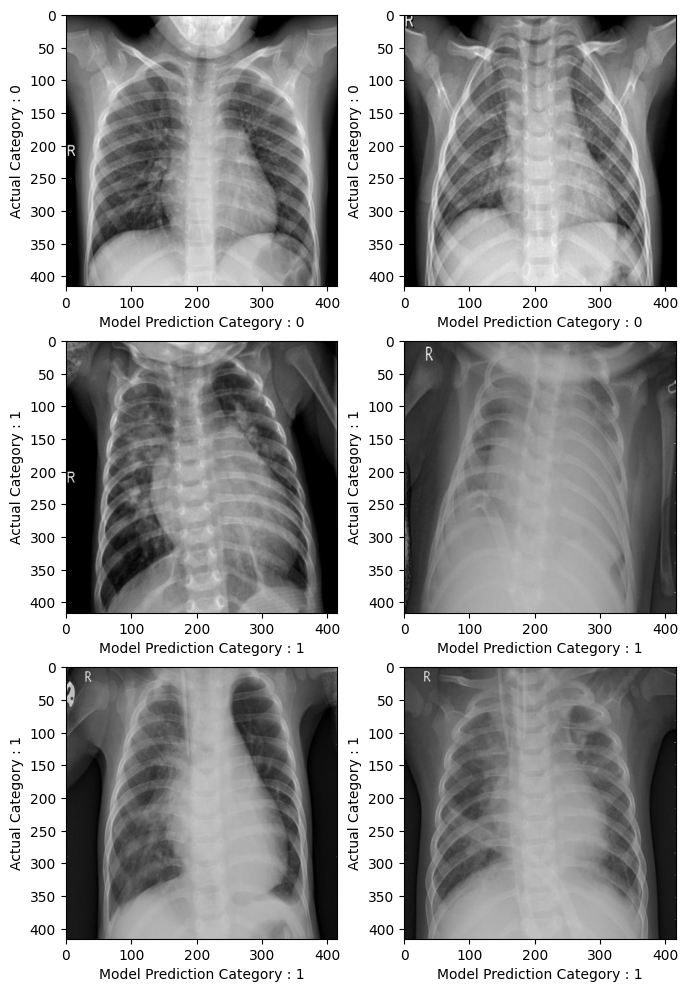

In [36]:
plt.figure(figsize=(8,12))

for x in range(6, 12):
  plt.subplot(3, 2, x + 1 - 6)
  # Reshape the image to add a batch dimension
  image = test_data[0][0][x]
  image = np.expand_dims(image, axis=0)  # Add batch dimension

  plt.xlabel(f"Model Prediction Category : {softmax_to_category(model.predict(image))}")
  plt.ylabel(f"Actual Category : {softmax_to_category(test_data[0][1][x])}")
  plt.imshow(test_data[0][0][x])